#PROJECT : Perform Exploratory Data Analysis on Elon Musk's Tweets

###Objectives
To Perform Exploratory Data Analysis on the dataset given to you. Major feature engineering techniques and data visualization should be applied to the dataset to draw useful and necessary inferences






---






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## DATASET ANALYSIS

To load the dataset and printout head() i.e first 5 columns to know about what kind of data is there.



*   have a glance of data columns

*   check the data type in every column


*   check NAN value






In [2]:
df=pd.read_csv('Elon.csv')
df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12562 non-null  int64  
 1   conversation_id  12562 non-null  int64  
 2   created_at       12562 non-null  object 
 3   date             12562 non-null  object 
 4   time             12562 non-null  object 
 5   timezone         12562 non-null  int64  
 6   user_id          12562 non-null  int64  
 7   username         12562 non-null  object 
 8   name             12562 non-null  object 
 9   place            0 non-null      float64
 10  tweet            12562 non-null  object 
 11  language         12562 non-null  object 
 12  mentions         12562 non-null  object 
 13  urls             12562 non-null  object 
 14  photos           12562 non-null  object 
 15  replies_count    12562 non-null  int64  
 16  retweets_count   12562 non-null  int64  
 17  likes_count 

In [4]:
df.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              12562
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          12152
video                  0
thumbnail          11770
near               12562
geo                12562
source             12562
user_rt_id         12562
user_rt            12562
retweet_id         12562
reply_to               0
retweet_date       12562
translate          12562
trans_src          12562
trans_dest         12562
dtype: int64

#Data Cleaning

---




*   From what it is observed , the columns "id" , "conversation_id" , "user_rt_id" ,
  "user_rt",  "retweet_id" are irrelevant related to what we are trying to find out so we are dropping those columns . 


*   Also we are popping the "name" column as we already know who has made the post i.e. Elon Musk







In [5]:
dff=df #alt variable for data dropping is used so as to recover any data loss
df.pop("id")
df.pop("conversation_id")
df.pop("user_id")
df.pop("username")
df.pop("name")
df.pop("place")
df.pop("language")

df.head()



,created_at,date,time,timezone,tweet,mentions,urls,photos,replies_count,retweets_count,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,Love this beautiful shot,[],[],[],2464,1517,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,The art In Cyberpunk is incredible,[],[],[],8437,10329,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,@itsALLrisky 🤣🤣,[],[],[],446,542,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN




*   Data popped for previous items now popping columns full of null values




In [6]:
df.isnull().sum()

created_at            0
date                  0
time                  0
timezone              0
tweet                 0
mentions              0
urls                  0
photos                0
replies_count         0
retweets_count        0
likes_count           0
hashtags              0
cashtags              0
link                  0
retweet               0
quote_url         12152
video                 0
thumbnail         11770
near              12562
geo               12562
source            12562
user_rt_id        12562
user_rt           12562
retweet_id        12562
reply_to              0
retweet_date      12562
translate         12562
trans_src         12562
trans_dest        12562
dtype: int64

In [7]:
df.pop("user_rt_id")
df.pop("user_rt")

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12557   NaN
12558   NaN
12559   NaN
12560   NaN
12561   NaN
Name: user_rt, Length: 12562, dtype: float64

In [8]:
df.pop("geo")
df.pop("near")
df.pop("retweet_id")
df.pop("source")
df.pop("retweet_date")
df.pop("trans_src")
df.pop("trans_dest")
df.pop("translate")
df.head()


,created_at,date,time,timezone,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to
0,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,[],[],https://twitter.com/elonmusk/status/1381273474...,False,NaN,0,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V..."
1,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,Love this beautiful shot,[],[],[],2464,1517,71161,[],[],https://twitter.com/elonmusk/status/1381273076...,False,NaN,0,NaN,[]
2,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,1380,[],[],https://twitter.com/elonmusk/status/1381258144...,False,NaN,0,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb..."
3,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,The art In Cyberpunk is incredible,[],[],[],8437,10329,228144,[],[],https://twitter.com/elonmusk/status/1381221447...,False,NaN,0,NaN,[]
4,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,@itsALLrisky 🤣🤣,[],[],[],446,542,7489,[],[],https://twitter.com/elonmusk/status/1381129584...,False,NaN,0,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',..."


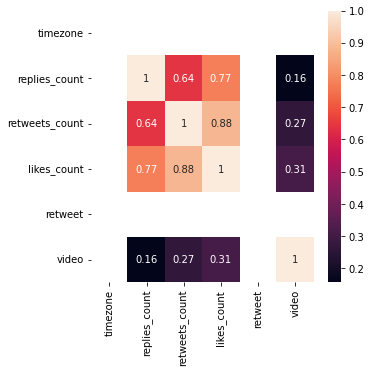

In [9]:
dfp=pd.read_csv('Elox.csv')#importing a copy of the csv file for heatmap comparison

corr=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True) 



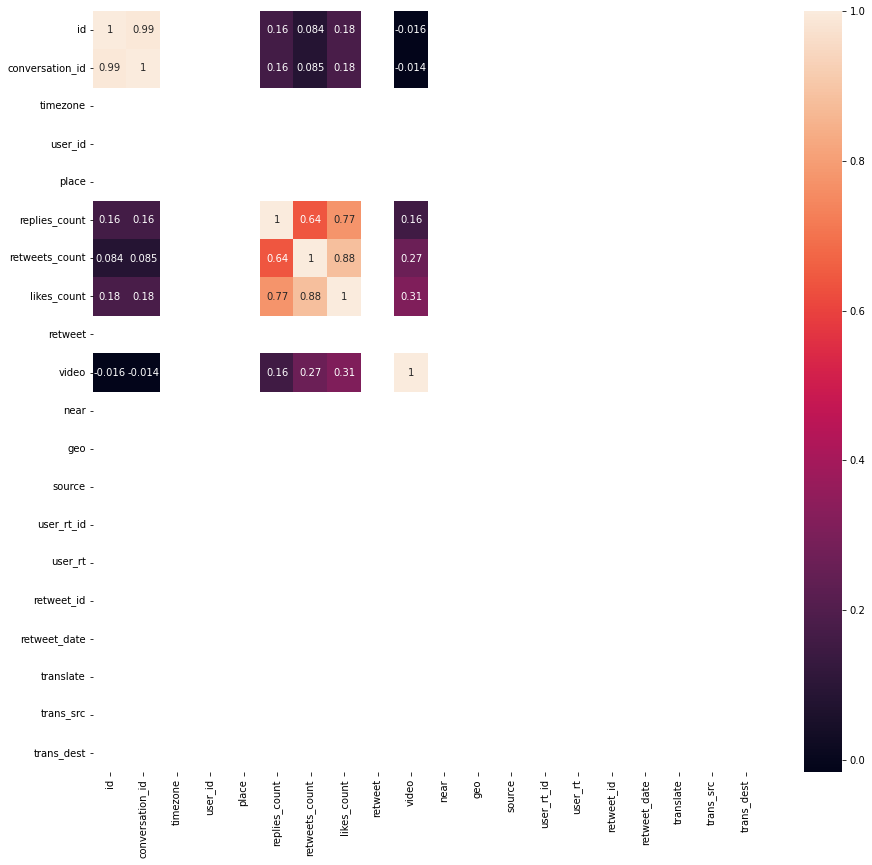

In [10]:
df.pop('timezone')#not correlated to anything relevant or anything at all
corr=dfp.corr()
plt.figure(figsize=(15,14))
sns.heatmap(corr,annot=True)

## Heatmap Comparison
Comparing the two maps between a clean and an unclean dataset we find that the deletion of columns had no effect whatsoever on the remaining values and does the dataset is clean without any variation being there.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      12562 non-null  object
 1   date            12562 non-null  object
 2   time            12562 non-null  object
 3   tweet           12562 non-null  object
 4   mentions        12562 non-null  object
 5   urls            12562 non-null  object
 6   photos          12562 non-null  object
 7   replies_count   12562 non-null  int64 
 8   retweets_count  12562 non-null  int64 
 9   likes_count     12562 non-null  int64 
 10  hashtags        12562 non-null  object
 11  cashtags        12562 non-null  object
 12  link            12562 non-null  object
 13  retweet         12562 non-null  bool  
 14  quote_url       410 non-null    object
 15  video           12562 non-null  int64 
 16  thumbnail       792 non-null    object
 17  reply_to        12562 non-null  object
dtypes: boo

#Exploratory Data Analysis

---



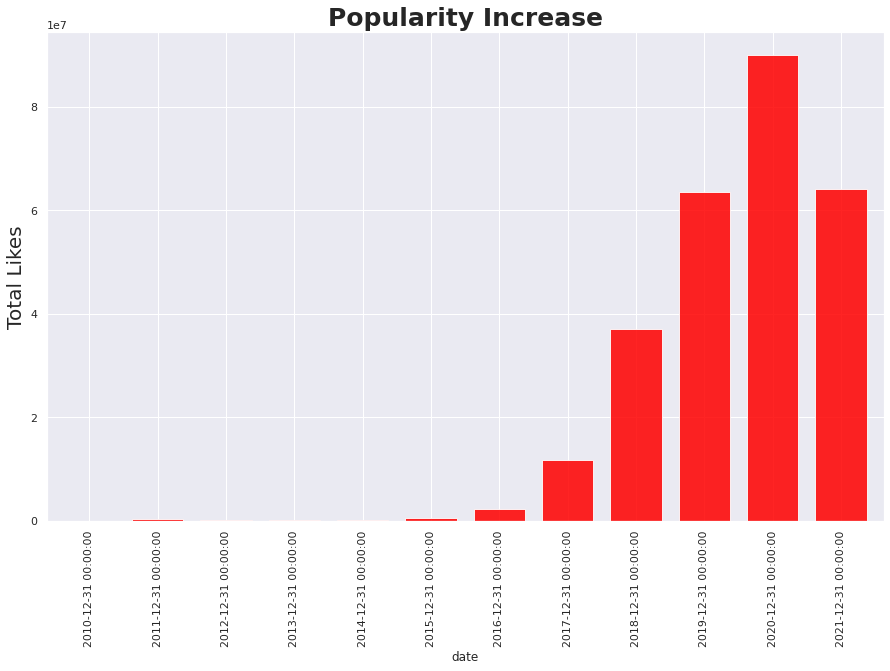

In [141]:
df.date=pd.to_datetime(df.date)
plt.figure(figsize=(15,9))
plt.ylabel('Total Likes',fontsize=20)
plt.title('Popularity Increase',fontsize=25,fontweight='bold')
sns.set()
dt=df.groupby(pd.Grouper(key='date',freq='1Y'))['likes_count'].sum()
dt.plot(kind='bar',color='red',alpha=0.86,width=0.75)


##Inferences 


*   The popularity of Elon Musk has risen during the covid era with the rise of Tesla and Meme Culture.



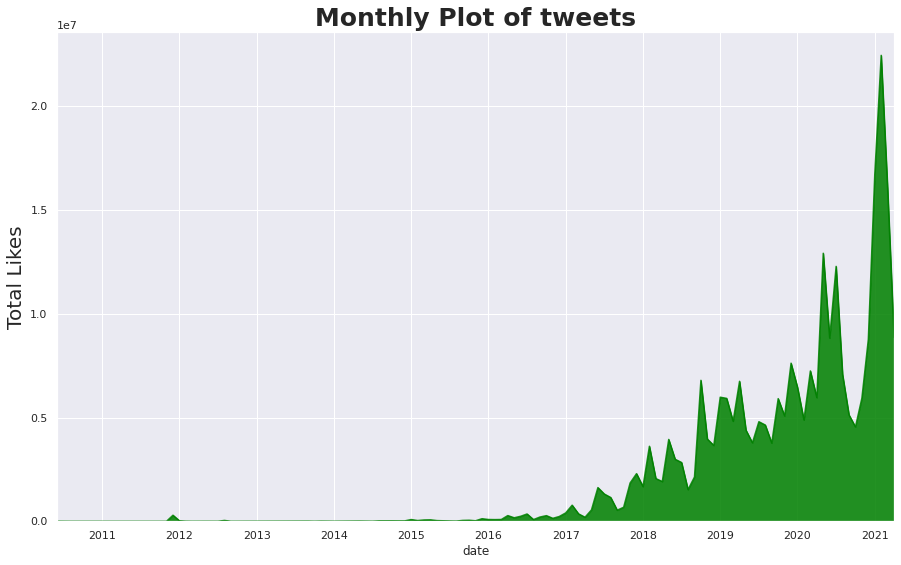

In [140]:
df.date=pd.to_datetime(df.date)
plt.figure(figsize=(15,9))
plt.ylabel('Total Likes',fontsize=20)
plt.title('Monthly Plot of tweets',fontsize=25,fontweight='bold')
sns.set()
dt=df.groupby(pd.Grouper(key='date',freq='1M'))['likes_count'].sum()
dt.plot(kind='area',color='green',alpha=0.86)

In [14]:
df['tweet_amount']="1"
df['tweet_amount']=df['tweet_amount'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      12562 non-null  object        
 1   date            12562 non-null  datetime64[ns]
 2   time            12562 non-null  object        
 3   tweet           12562 non-null  object        
 4   mentions        12562 non-null  object        
 5   urls            12562 non-null  object        
 6   photos          12562 non-null  object        
 7   replies_count   12562 non-null  int64         
 8   retweets_count  12562 non-null  int64         
 9   likes_count     12562 non-null  int64         
 10  hashtags        12562 non-null  object        
 11  cashtags        12562 non-null  object        
 12  link            12562 non-null  object        
 13  retweet         12562 non-null  bool          
 14  quote_url       410 non-null    object        
 15  vi

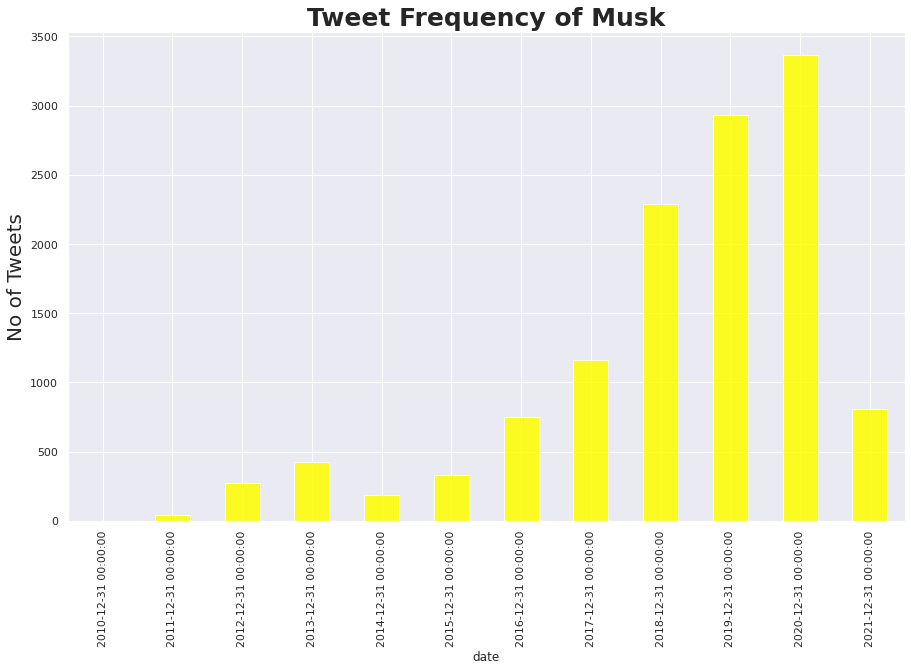

In [139]:
plt.figure(figsize=(15,9))
plt.ylabel('No of Tweets',fontsize=20)
plt.title('Tweet Frequency of Musk',fontsize=25,fontweight='bold')
sns.set()
dt=df.groupby(pd.Grouper(key='date',freq='1Y'))['tweet_amount'].sum()
dt.plot(kind='bar',color='yellow',alpha=0.86)

#Inference


*   The Most amount of tweets made by Musk was in 2020 , that is , during the major covid lockdowns and this gained him a lot of popularity if we observe the popularity increase graph with this one. 
*   Elon Musk made a significantly less amount of tweets in 2021 proceeding the lockdown period , which could imply that 2020 was strategic in improving his popularity to push Tesla and Bitcoin values so that he could acquire profit and e stopped once they went stagnant.



---




####Here we have created a variable "twitter_tweet" which stores the tweets which have mentioned the substring 'twitter' this is done to gather further information of Elon Musk's Twitter acquisition back in April 2022

In [16]:
twitter_tweet=df.loc[df['tweet'].str.contains("twitter", case=False)]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      12562 non-null  object        
 1   date            12562 non-null  datetime64[ns]
 2   time            12562 non-null  object        
 3   tweet           12562 non-null  object        
 4   mentions        12562 non-null  object        
 5   urls            12562 non-null  object        
 6   photos          12562 non-null  object        
 7   replies_count   12562 non-null  int64         
 8   retweets_count  12562 non-null  int64         
 9   likes_count     12562 non-null  int64         
 10  hashtags        12562 non-null  object        
 11  cashtags        12562 non-null  object        
 12  link            12562 non-null  object        
 13  retweet         12562 non-null  bool          
 14  quote_url       410 non-null    object        
 15  vi

#Analysis Based on tweets



In [17]:
twitter_tweet.head()#printing the first 5 values in the newly acquired twitter specific dataset of ours.

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount
139,2021-03-27 05:16:42 EET,2021-03-27,05:16:42,@RationalEtienne @TwitterSupport @jack This ap...,[],[],[],261,186,3313,[],[],https://twitter.com/elonmusk/status/1375647941...,False,NaN,0,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'T...",1
188,2021-03-20 17:52:39 EET,2021-03-20,17:52:39,@Erdayastronaut @Twitter @TwitterComms @verifi...,[],[],[],536,340,11868,[],[],https://twitter.com/elonmusk/status/1373301467...,False,NaN,0,NaN,"[{'screen_name': 'Erdayastronaut', 'name': 'Ev...",1
534,2021-02-02 10:45:48 EET,2021-02-02,10:45:48,Off Twitter for a while,[],[],[],34509,24830,540168,[],[],https://twitter.com/elonmusk/status/1356524205...,False,NaN,0,NaN,[],1
1610,2020-09-21 02:21:18 EEST,2020-09-21,02:21:18,"@ID_AA_Carmack For Dojo, we’re betting on FP16...",[],[],[],91,126,2678,[],[],https://twitter.com/elonmusk/status/1307822172...,False,NaN,0,NaN,"[{'screen_name': 'ID_AA_Carmack', 'name': 'Joh...",1
1968,2020-08-08 22:51:49 EEST,2020-08-08,22:51:49,@RationalEtienne @BernieSanders I wonder if he...,[],[],[],320,133,4007,[],[],https://twitter.com/elonmusk/status/1292186775...,False,NaN,0,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'P...",1


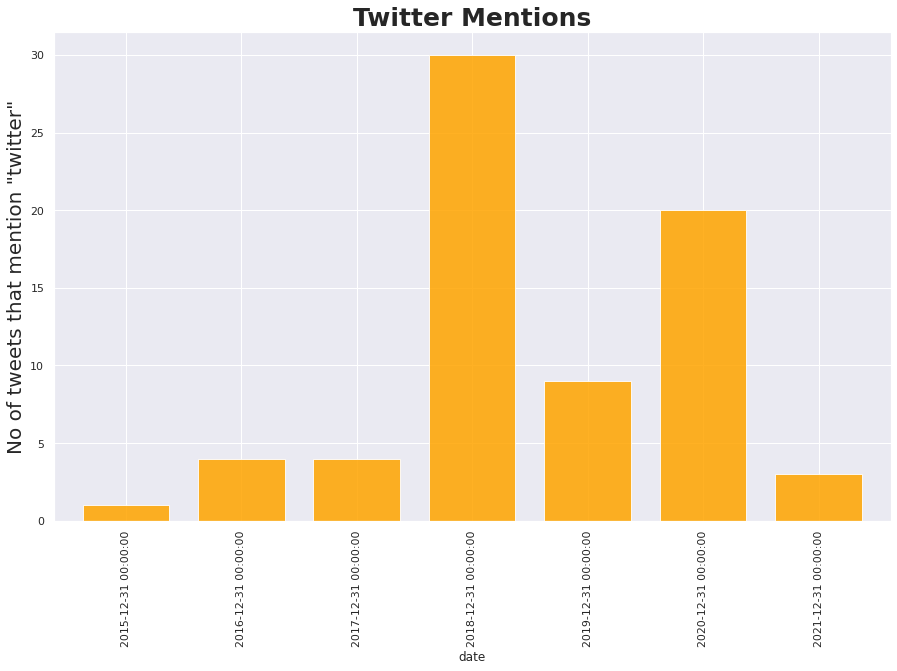

In [138]:
df.date=pd.to_datetime(df.date)
plt.figure(figsize=(15,9))
plt.ylabel('No of tweets that mention "twitter"',fontsize=20)
plt.title('Twitter Mentions',fontsize=25,fontweight='bold')
sns.set()
dt=twitter_tweet.groupby(pd.Grouper(key='date',freq='1Y'))['tweet_amount'].sum()
dt.plot(kind='bar',color='orange',alpha=0.86,width=0.75)

##Inference

*  Musk mentioned twitter most in 2018 and the least in 2021 , we exclude the data of 2015 as its mostly irrelevant compared to the other data we have got.



In [19]:
twitter_tweet['date_specific']=twitter_tweet.loc[:, 'date']
twitter_tweet['date_specific']=twitter_tweet['date_specific'].astype(str)
tweet_2021=twitter_tweet.loc[twitter_tweet['date_specific'].str.contains("2021", case=False)]
tweet_2021.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount,date_specific
139,2021-03-27 05:16:42 EET,2021-03-27,05:16:42,@RationalEtienne @TwitterSupport @jack This ap...,[],[],[],261,186,3313,[],[],https://twitter.com/elonmusk/status/1375647941...,False,NaN,0,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'T...",1,2021-03-27
188,2021-03-20 17:52:39 EET,2021-03-20,17:52:39,@Erdayastronaut @Twitter @TwitterComms @verifi...,[],[],[],536,340,11868,[],[],https://twitter.com/elonmusk/status/1373301467...,False,NaN,0,NaN,"[{'screen_name': 'Erdayastronaut', 'name': 'Ev...",1,2021-03-20
534,2021-02-02 10:45:48 EET,2021-02-02,10:45:48,Off Twitter for a while,[],[],[],34509,24830,540168,[],[],https://twitter.com/elonmusk/status/1356524205...,False,NaN,0,NaN,[],1,2021-02-02


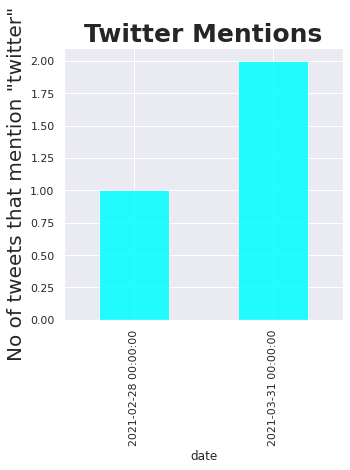

In [20]:

plt.figure(figsize=(5,5))
plt.ylabel('No of tweets that mention "twitter"',fontsize=20)
plt.title('Twitter Mentions',fontsize=25,fontweight='bold')
sns.set()
dt=tweet_2021.groupby(pd.Grouper(key='date',freq='1M'))['tweet_amount'].sum()
dt.plot(kind='bar',color='cyan',alpha=0.86,width=0.5)

##Inference



*   According to the given dataset till april 2021 , Musk made 3 tweets regarding twitter one in february and one 2 in march . The one in Feb mentioned he was going off twitter for a while. Whereas the rest 2 were about the shadowbans of @Erdayastronaut and "The Pope of Muskanity" (@RationalEtienne). Musk complaining to twitter about them in both his march tweets.This might indicate his growing agitation towards twitter's ban policies.






#Analysis on Musk's Bitcoin Endeavours

---



####First we realize a csv file that contains tweets with just the word "BITCOIN" in them , this would help us gather and make more relevant graphs


In [22]:
bitcoin_data=df.loc[df['tweet'].str.contains("Bitcoin", case=False)]
bitcoin_data.head()#Printing the dataframe 

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount
162,2021-03-24 09:10:43 EET,2021-03-24,09:10:43,Pay by Bitcoin capability available outside US...,[],[],[],3152,9279,141418,[],[],https://twitter.com/elonmusk/status/1374619672...,False,NaN,0,NaN,[],1
163,2021-03-24 09:09:34 EET,2021-03-24,09:09:34,Tesla is using only internal &amp; open source...,[],[],[],4675,20572,179638,[],[],https://twitter.com/elonmusk/status/1374619379...,False,NaN,0,NaN,[],1
164,2021-03-24 09:02:40 EET,2021-03-24,09:02:40,You can now buy a Tesla with Bitcoin,[],[],[],36954,115994,902515,[],[],https://twitter.com/elonmusk/status/1374617643...,False,NaN,0,NaN,[],1
244,2021-03-12 20:58:22 EET,2021-03-12,20:58:22,BTC (Bitcoin) is an anagram of TBC(The Boring ...,[],[],[],12073,17825,245163,[],[],https://twitter.com/elonmusk/status/1370449101...,False,NaN,0,NaN,[],1
410,2021-02-19 05:11:31 EET,2021-02-19,05:11:31,"@business To be clear, I am *not* an investor,...",[],[],[],2187,6318,35319,[],[],https://twitter.com/elonmusk/status/1362600676...,False,NaN,0,NaN,"[{'screen_name': 'business', 'name': 'Bloomber...",1


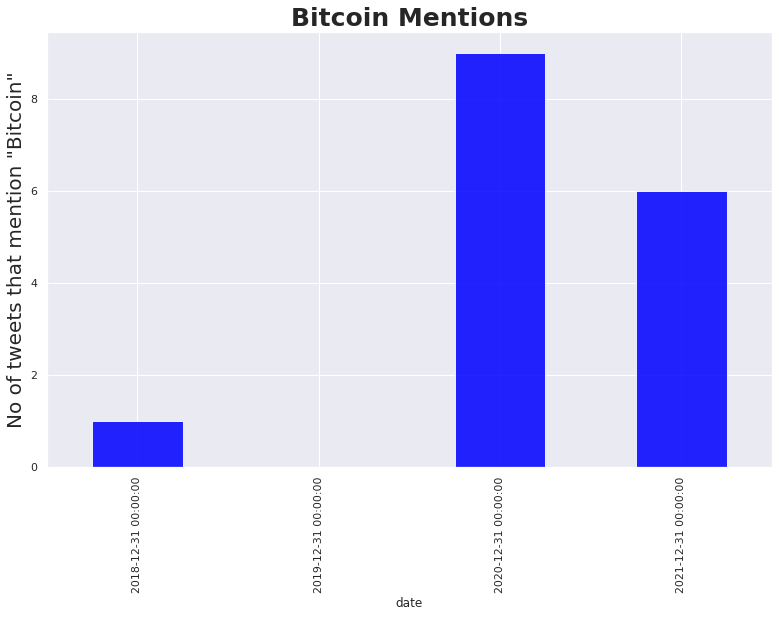

In [23]:
plt.figure(figsize=(13,8))
plt.ylabel('No of tweets that mention "Bitcoin"',fontsize=20)
plt.title('Bitcoin Mentions',fontsize=25,fontweight='bold')
sns.set()
dt=bitcoin_data.groupby(pd.Grouper(key='date',freq='1Y'))['tweet_amount'].sum()
dt.plot(kind='bar',color='blue',alpha=0.86,width=0.5)

#Inferences


*   Mentions of Bitcoin were highest in 2020 , but can be significantly larger in 2021 as the data is just till april 2021
*  This is the time bitcoin boomed.



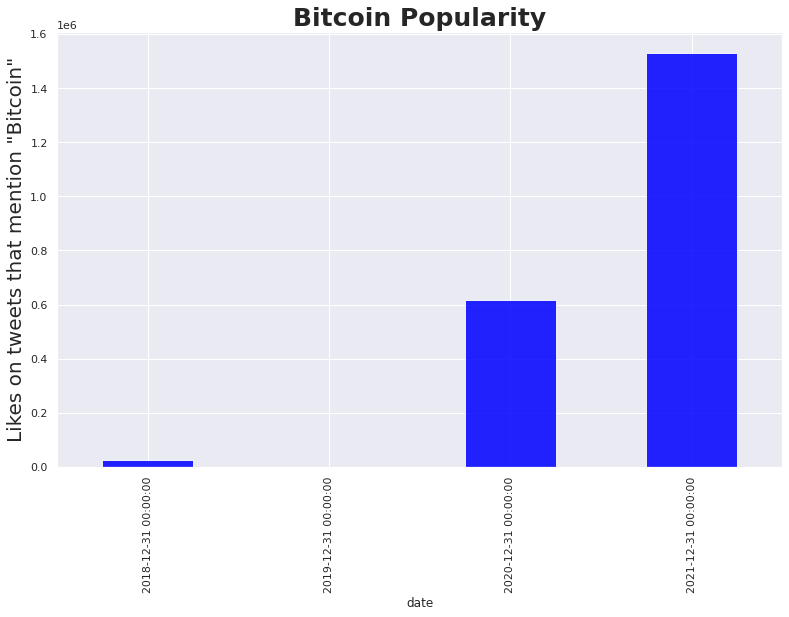

In [24]:
plt.figure(figsize=(13,8))
plt.ylabel('Likes on tweets that mention "Bitcoin"',fontsize=20)
plt.title('Bitcoin Popularity',fontsize=25,fontweight='bold')
sns.set()
dt=bitcoin_data.groupby(pd.Grouper(key='date',freq='1Y'))['likes_count'].sum()
dt.plot(kind='bar',color='blue',alpha=0.86,width=0.5)

#####However if we look at the popularity estimate with the number of likes per bitcoin tweet in just 4 months , it far exceeds the likes of 2020 , a whole year.

In [25]:
bt=pd.read_csv('coin_Bitcoin.csv')
do=pd.read_csv('coin_Dogecoin.csv')
bt.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [26]:
bt.Date=pd.to_datetime(bt.Date)
bt.pop('Name')
bt.pop('SNo')
bt.pop('Symbol')



0       BTC
1       BTC
2       BTC
3       BTC
4       BTC
       ... 
2986    BTC
2987    BTC
2988    BTC
2989    BTC
2990    BTC
Name: Symbol, Length: 2991, dtype: object

In [27]:
bt.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

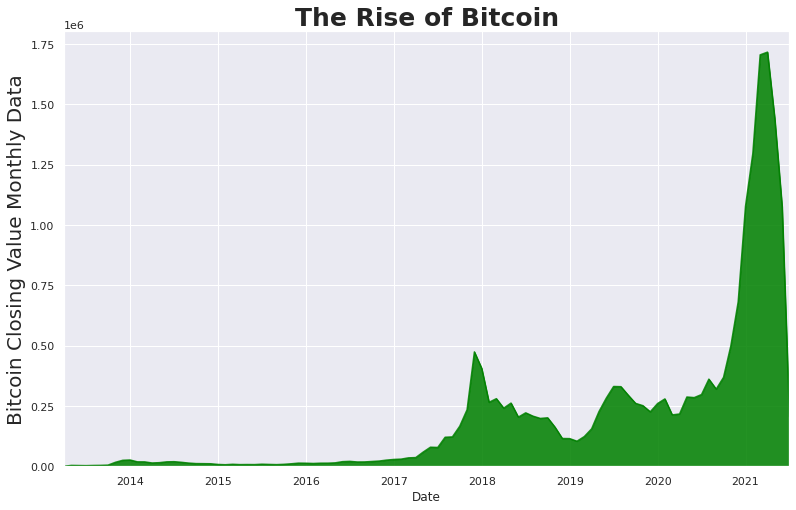

In [28]:
bt_yearsum=bt.groupby(pd.Grouper(key='Date', freq='1M'))['Close'].sum()
plt.figure(figsize=(13,8))
plt.ylabel('Bitcoin Closing Value Monthly Data',fontsize=20)
plt.title('The Rise of Bitcoin',fontsize=25,fontweight='bold')
sns.set()
bt_yearsum.plot(kind='area',alpha=0.86,color='green')

In [29]:
bts=bt
bts.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [30]:
bt['date1']=bt.loc[:, 'Date']
bt['date1']=bt['date1'].astype(str)
bt['year'] = bt['date1'].apply(lambda x: int(x.split("-")[0]))
bt.head()

,Date,High,Low,Open,Close,Volume,Marketcap,date1,year
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013-04-29 23:59:59,2013
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013-04-30 23:59:59,2013
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013-05-01 23:59:59,2013
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013-05-02 23:59:59,2013
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013-05-03 23:59:59,2013


In [31]:
df['date2']=df.loc[:, 'date']
df['date2']=df['date2'].astype(str)

df['year'] = df['date2'].apply(lambda x: int(x.split("-")[0]))
df.head()

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,...,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount,date2,year
0,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,[],https://twitter.com/elonmusk/status/1381273474...,False,NaN,0,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",1,2021-04-11,2021
1,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,Love this beautiful shot,[],[],[],2464,1517,71161,...,[],https://twitter.com/elonmusk/status/1381273076...,False,NaN,0,NaN,[],1,2021-04-11,2021
2,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,1380,...,[],https://twitter.com/elonmusk/status/1381258144...,False,NaN,0,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",1,2021-04-11,2021
3,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,The art In Cyberpunk is incredible,[],[],[],8437,10329,228144,...,[],https://twitter.com/elonmusk/status/1381221447...,False,NaN,0,NaN,[],1,2021-04-11,2021
4,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,@itsALLrisky 🤣🤣,[],[],[],446,542,7489,...,[],https://twitter.com/elonmusk/status/1381129584...,False,NaN,0,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",1,2021-04-11,2021


####Merging the Bitcoin dataset with the Original Data set to plot a heatmap to find correlation between elon's popularity and bitcoin market cap a year

---



In [32]:
dff=df
bt.pop("date1")

df2=pd.merge(dff,bt)
df2.head()

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,...,tweet_amount,date2,year,Date,High,Low,Open,Close,Volume,Marketcap
0,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,1,2021-04-11,2021,2021-01-01 23:59:59,29600.626950,28803.585014,28994.008916,29374.151889,4.073030e+10,5.460016e+11
1,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,1,2021-04-11,2021,2021-01-02 23:59:59,33155.118819,29091.181191,29376.455834,32127.267939,6.786542e+10,5.972059e+11
2,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,1,2021-04-11,2021,2021-01-03 23:59:59,34608.556738,32052.317076,32129.407356,32782.024466,7.866524e+10,6.094092e+11
3,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,1,2021-04-11,2021,2021-01-04 23:59:59,33440.218569,28722.755271,32810.947644,31971.913522,8.116348e+10,5.943840e+11
4,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,1,2021-04-11,2021,2021-01-05 23:59:59,34437.590592,30221.186739,31977.041132,33992.429344,6.754732e+10,6.319800e+11


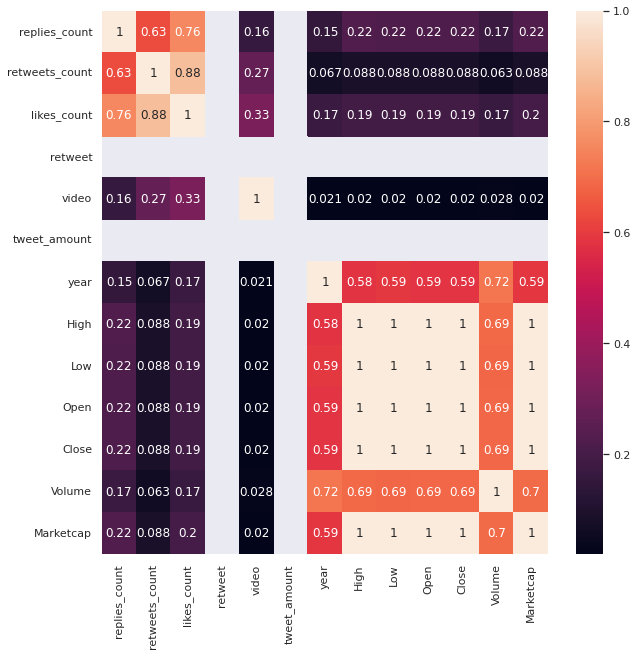

In [33]:

corr=df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True) 

In [34]:
do.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


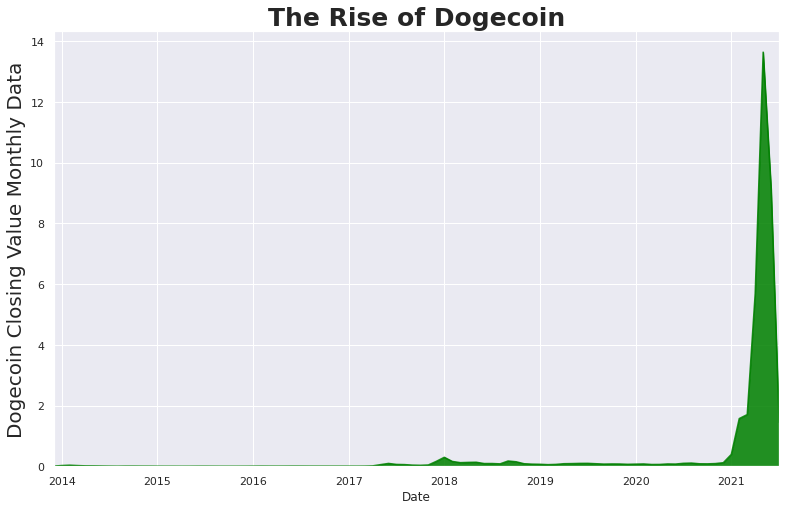

In [35]:
do.Date=pd.to_datetime(do.Date)
do_yearsum=do.groupby(pd.Grouper(key='Date', freq='1M'))['Close'].sum()
plt.figure(figsize=(13,8))
plt.ylabel('Dogecoin Closing Value Monthly Data',fontsize=20)
plt.title('The Rise of Dogecoin',fontsize=25,fontweight='bold')
sns.set()
do_yearsum.plot(kind='area',alpha=0.86,color='green')

In [62]:
bt_2020=bitcoin_data.loc[df['date2'].str.contains("2020", case=False)]
bt_2021=bitcoin_data.loc[df['date2'].str.contains("2021", case=False)]

bt_2020.head()

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount
863,2020-12-20 11:24:37 EET,2020-12-20,11:24:37,Bitcoin is almost as bs as fiat money,[],[],[],8196,9994,140112,[],[],https://twitter.com/elonmusk/status/1340588909...,False,NaN,0,NaN,[],1
871,2020-12-20 10:21:25 EET,2020-12-20,10:21:25,Bitcoin is my safe word,[],[],[],6700,19942,239982,[],[],https://twitter.com/elonmusk/status/1340573003...,False,NaN,0,NaN,[],1
1081,2020-11-17 00:02:51 EET,2020-11-17,00:02:51,@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶,[],[],[],1107,3320,66188,[],[],https://twitter.com/elonmusk/status/1328458535...,False,NaN,0,NaN,"[{'screen_name': 'Maisie_Williams', 'name': 'M...",1
2797,2020-05-16 01:51:44 EEST,2020-05-16,01:51:44,@jk_rowling I still only own 0.25 Bitcoins btw,[],[],[],1650,981,9674,[],[],https://twitter.com/elonmusk/status/1261429085...,False,NaN,0,NaN,"[{'screen_name': 'jk_rowling', 'name': 'J.K. R...",1
2798,2020-05-16 01:03:01 EEST,2020-05-16,01:03:01,"@jk_rowling Pretty much, although massive curr...",[],[],[],749,2842,14939,[],[],https://twitter.com/elonmusk/status/1261416824...,False,NaN,0,NaN,"[{'screen_name': 'jk_rowling', 'name': 'J.K. R...",1


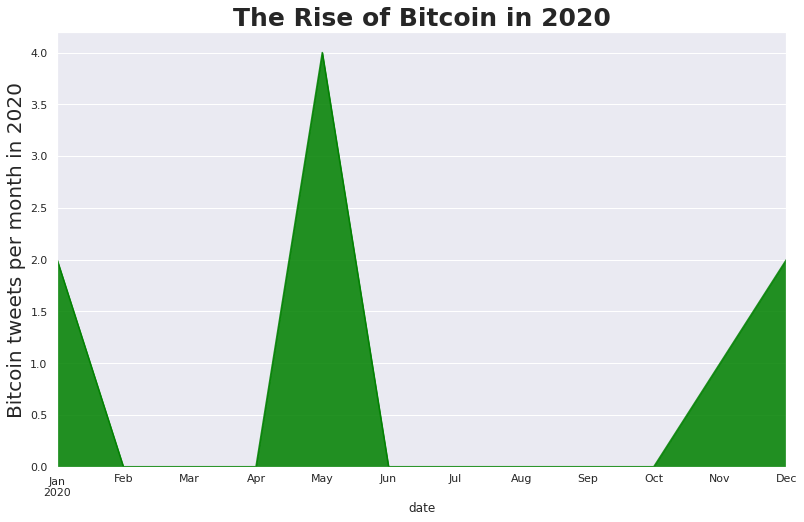

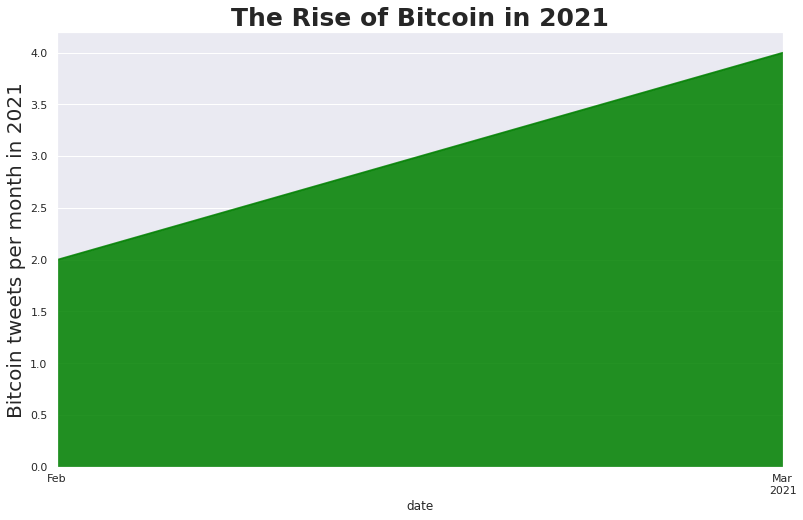

In [66]:
bt_2=bt_2020.groupby(pd.Grouper(key='date',freq='1M'))['tweet_amount'].sum()

plt.figure(figsize=(13.07,8))
plt.ylabel('Bitcoin tweets per month in 2020',fontsize=20)
plt.title('The Rise of Bitcoin in 2020',fontsize=25,fontweight='bold')
sns.set()
bt_2.plot(kind='area',alpha=0.86,color='green')
bt_3=bt_2021.groupby(pd.Grouper(key='date',freq='1M'))['tweet_amount'].sum()

plt.figure(figsize=(13.005,8))
plt.ylabel('Bitcoin tweets per month in 2021',fontsize=20)
plt.title('The Rise of Bitcoin in 2021',fontsize=25,fontweight='bold')
sns.set()
bt_3.plot(kind='area',alpha=0.86,color='green')

## Inference


*   So the hike in bitcoin mentions by musk was in may 2020 
*   We can list all his March tweets and find the correlation to bitcoin price hike in 2020 as we observed in the previous dataset




In [42]:
bt_2020['date2']=bt_2020.loc[:, 'date']
bt_2020['date2']=bt_2020['date2'].astype(str)
bit_2020_january=bt_2020.loc[bt_2020['date2'].str.contains("-01-", case=False)]
bit_2020_april=bt_2020.loc[bt_2020['date2'].str.contains("-04-", case=False)]
bit_2020_june=bt_2020.loc[bt_2020['date2'].str.contains("-05-", case=False)]
print(bt_2020.tweet)

863                 Bitcoin is almost as bs as fiat money
871                               Bitcoin is my safe word
1081    @Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶
2797       @jk_rowling I still only own 0.25 Bitcoins btw
2798    @jk_rowling Pretty much, although massive curr...
3061    @Bitcoin How much for some anime Bitcoin?  htt...
3063                                          @Bitcoin 🤣🤣
4095                                   @bitcoin2020conf 😉
4096                        Bitcoin is *not* my safe word
Name: tweet, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##Now We are going to plot Bitcoin's Monthly Growth in the year 2020

FOR 2021


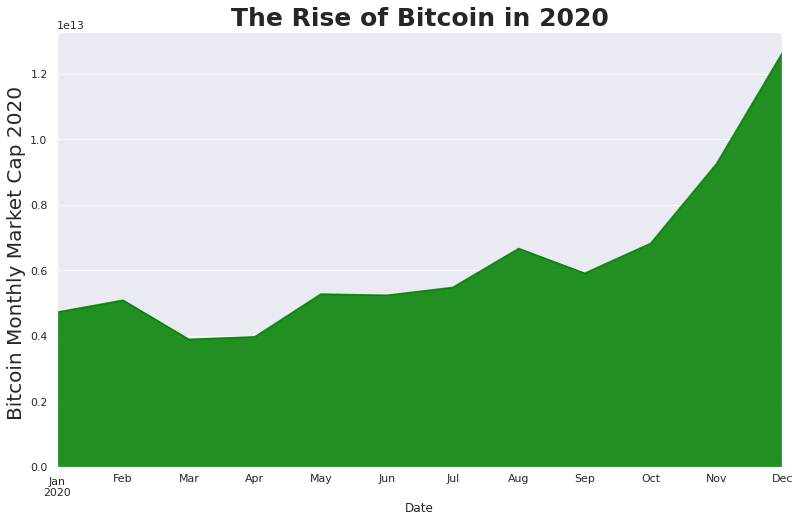

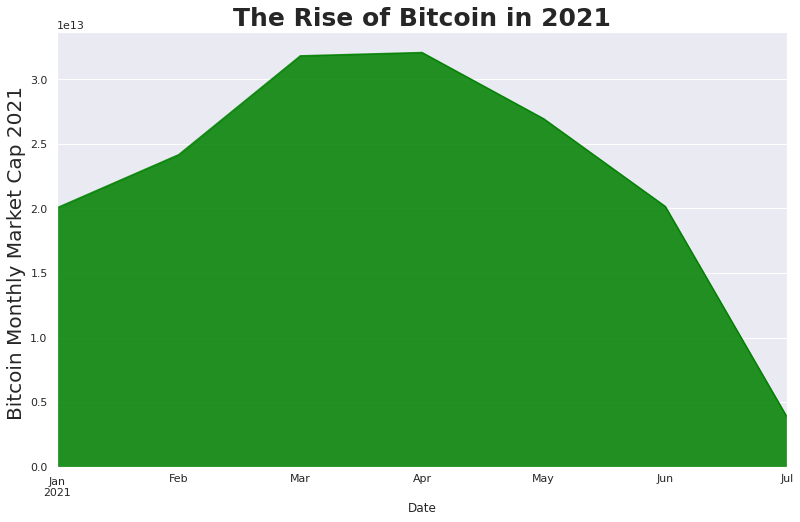

In [61]:
bt['date1']=bt.loc[:, 'Date']
bt['date1']=bt['date1'].astype(str)
bt_2020M=bt.loc[bt['date1'].str.contains("2020", case=False)]
bt_2020Growth=bt_2020M.groupby(pd.Grouper(key='Date', freq='1M'))['Marketcap'].sum()
plt.figure(figsize=(13,8))
plt.ylabel('Bitcoin Monthly Market Cap 2020 ',fontsize=20)
plt.title('The Rise of Bitcoin in 2020',fontsize=25,fontweight='bold')
sns.set()
bt_2020Growth.plot(kind='area',alpha=0.86,color='green')
print("FOR 2021")
bt_2021M=bt.loc[bt['date1'].str.contains("2021", case=False)]
bt_2021Growth=bt_2021M.groupby(pd.Grouper(key='Date', freq='1M'))['Marketcap'].sum()
plt.figure(figsize=(13.08,8))
plt.ylabel('Bitcoin Monthly Market Cap 2021 ',fontsize=20)
plt.title('The Rise of Bitcoin in 2021',fontsize=25,fontweight='bold')
sns.set()
bt_2021Growth.plot(kind='area',alpha=0.86,color='green')

## Inference
Here we find out that in bitcoin started to boom for real in the end of 2020 and in 2021 we find that bitcoin was almost double its in april than it was in December 2021 , Here find out a direct correlation with Musk's Tweets in 2021 mentioning bitcoin from which we can infer that Musk really does affect the masses with his tweets.

#

#Musk's Doge Quest

---



In [45]:
dogecoin_data=df.loc[df['tweet'].str.contains("Dogecoin", case=False)]
dogecoin_data.head(100)#Printing the dataframe 

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,...,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount,date2,year
103,2021-04-01 13:25:23 EEST,2021-04-01,13:25:23,SpaceX is going to put a literal Dogecoin on t...,[],[],[],25947,50139,535373,...,[],https://twitter.com/elonmusk/status/1377567762...,False,NaN,0,NaN,[],1,2021-04-01,2021
158,2021-03-25 09:33:56 EET,2021-03-25,09:33:56,@dogecoinww @MattWallace888 @CorinnaKopf You r...,[],[],[],129,245,7908,...,[],https://twitter.com/elonmusk/status/1374987902...,False,NaN,0,NaN,"[{'screen_name': 'dogecoinww', 'name': 'Dogeco...",1,2021-03-25,2021
234,2021-03-14 01:46:16 EET,2021-03-14,01:46:16,Origin of Doge Day Afternoon: The ancient Roma...,[],[],[],2482,7826,76253,...,[],https://twitter.com/elonmusk/status/1370883943...,False,NaN,0,NaN,[],1,2021-03-14,2021
325,2021-03-02 10:36:34 EET,2021-03-02,10:36:34,@draecomino 2022: Dogecoin is dumb,[],[],[],828,1994,14417,...,[],https://twitter.com/elonmusk/status/1366668744...,False,NaN,0,NaN,"[{'screen_name': 'draecomino', 'name': 'James ...",1,2021-03-02,2021
397,2021-02-20 12:06:29 EET,2021-02-20,12:06:29,@PPathole @dogecoin Just some used Antminer L3...,[],[],[],644,769,9086,...,[],https://twitter.com/elonmusk/status/1363067491...,False,NaN,0,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",1,2021-02-20,2021
399,2021-02-20 10:42:28 EET,2021-02-20,10:42:28,@dogecoin I just set up some little Doge minin...,[],[],[],3020,6829,56086,...,[],https://twitter.com/elonmusk/status/1363046350...,False,NaN,0,NaN,"[{'screen_name': 'dogecoin', 'name': 'Dogecoin...",1,2021-02-20,2021
430,2021-02-15 01:25:16 EET,2021-02-15,01:25:16,If major Dogecoin holders sell most of their c...,[],[],[],29046,35001,332146,...,[],https://twitter.com/elonmusk/status/1361094185...,False,NaN,0,NaN,[],1,2021-02-15,2021
452,2021-02-10 17:08:11 EET,2021-02-10,17:08:11,"Bought some Dogecoin for lil X, so he can be a...",[],[],[],29116,59638,551419,...,[],https://twitter.com/elonmusk/status/1359519541...,False,NaN,0,NaN,[],1,2021-02-10,2021
486,2021-02-07 04:36:32 EET,2021-02-07,04:36:32,@Jbuttermost @Dogecoinrich 🤣🤣,[],[],[],273,728,7756,...,[],https://twitter.com/elonmusk/status/1358243215...,False,NaN,0,NaN,"[{'screen_name': 'Jbuttermost', 'name': 'Josia...",1,2021-02-07,2021
488,2021-02-07 04:24:19 EET,2021-02-07,04:24:19,@Dogecoinrich 🤣🤣,[],[],[],957,3129,61150,...,[],https://twitter.com/elonmusk/status/1358240143...,False,NaN,0,NaN,"[{'screen_name': 'Dogecoinrich', 'name': 'Doge...",1,2021-02-07,2021


##Inference


*   In total Musk has mentioned dogecoin 17 times total in his tweets 


##Plotting the rise of dogecoin 

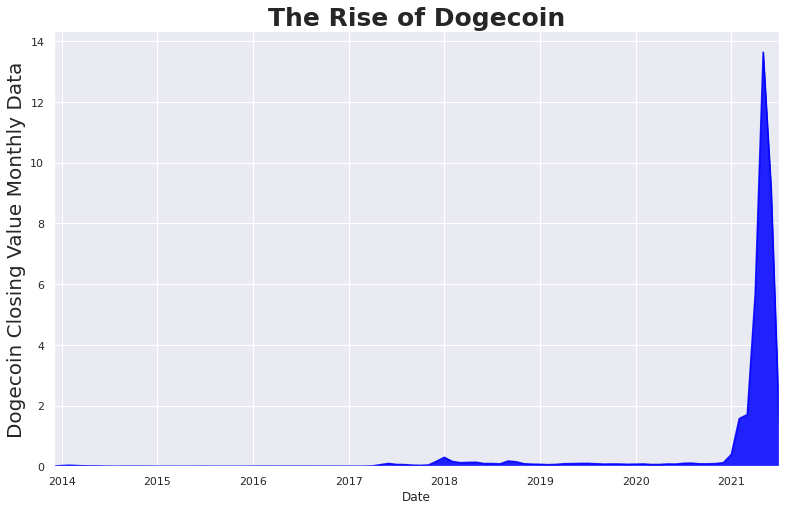

In [67]:
do.Date=pd.to_datetime(do.Date)
do_yearsum=do.groupby(pd.Grouper(key='Date', freq='1M'))['Close'].sum()
plt.figure(figsize=(13,8))
plt.ylabel('Dogecoin Closing Value Monthly Data',fontsize=20)
plt.title('The Rise of Dogecoin',fontsize=25,fontweight='bold')
sns.set()
do_yearsum.plot(kind='area',alpha=0.86,color='blue')

In [68]:
do.Date=pd.to_datetime(bt.Date)
do.pop('Name')
do.pop('SNo')
do.pop('Symbol')

0       DOGE
1       DOGE
2       DOGE
3       DOGE
4       DOGE
        ... 
2755    DOGE
2756    DOGE
2757    DOGE
2758    DOGE
2759    DOGE
Name: Symbol, Length: 2760, dtype: object

In [70]:
do.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [71]:
do.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2013-04-30 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,2013-05-01 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,2013-05-02 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,2013-05-03 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


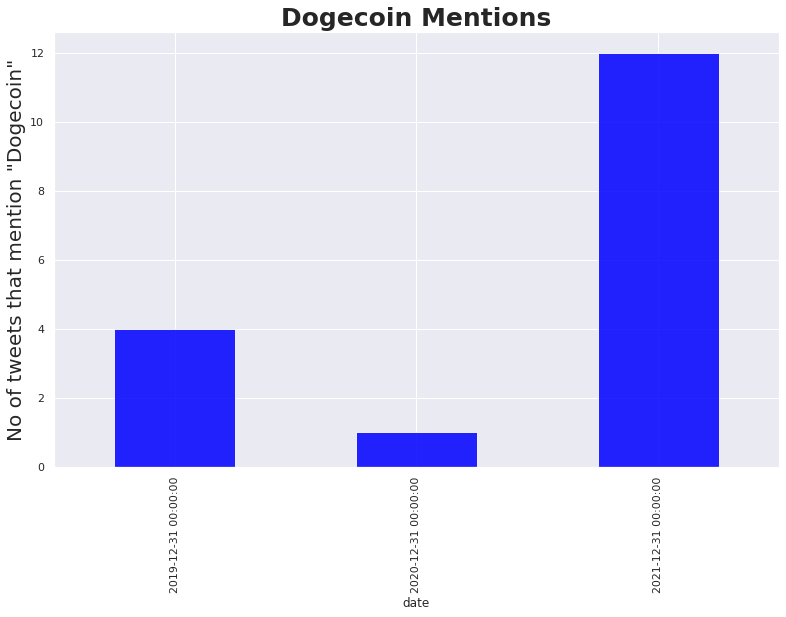

In [73]:
plt.figure(figsize=(13,8))
plt.ylabel('No of tweets that mention "Dogecoin"',fontsize=20)
plt.title('Dogecoin Mentions',fontsize=25,fontweight='bold')
sns.set()
dt=dogecoin_data.groupby(pd.Grouper(key='date',freq='1Y'))['tweet_amount'].sum()
dt.plot(kind='bar',color='blue',alpha=0.86,width=0.5)

##Inference


*   Highest Dogecoin mentions were in 12 Tweets in 2021 by Elon
*   He did mention it 4 times in 2019

*   We are going to list the tweets he made in 2021 to find something of it 

*   He made only a single tweet in 2020 about dogecoin so that would not prove relevant 







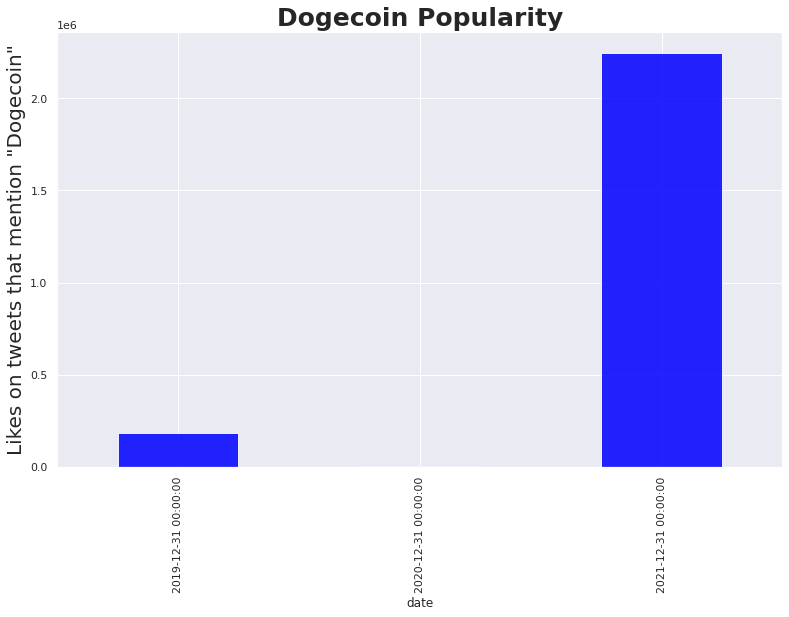

In [74]:
plt.figure(figsize=(13,8))
plt.ylabel('Likes on tweets that mention "Dogecoin"',fontsize=20)
plt.title('Dogecoin Popularity',fontsize=25,fontweight='bold')
sns.set()
dt=dogecoin_data.groupby(pd.Grouper(key='date',freq='1Y'))['likes_count'].sum()
dt.plot(kind='bar',color='blue',alpha=0.86,width=0.5)

## Inferences

*   Highly Evident from the previous plot we find that the most amount of likes gathered were in 2021 and thus it popularity increased more than 8 times




In [75]:
do['date1']=do.loc[:, 'Date']
do['date1']=do['date1'].astype(str)
do['year'] = do['date1'].apply(lambda x: int(x.split("-")[0]))
do.head()

,Date,High,Low,Open,Close,Volume,Marketcap,year,date1
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013,2013-04-29 23:59:59
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013,2013-04-30 23:59:59
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013,2013-05-01 23:59:59
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013,2013-05-02 23:59:59
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013,2013-05-03 23:59:59


In [76]:
df['date2']=df.loc[:, 'date']
df['date2']=df['date2'].astype(str)

df['year'] = df['date2'].apply(lambda x: int(x.split("-")[0]))
df.head()

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,...,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount,date2,year
0,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,[],https://twitter.com/elonmusk/status/1381273474...,False,NaN,0,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",1,2021-04-11,2021
1,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,Love this beautiful shot,[],[],[],2464,1517,71161,...,[],https://twitter.com/elonmusk/status/1381273076...,False,NaN,0,NaN,[],1,2021-04-11,2021
2,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,1380,...,[],https://twitter.com/elonmusk/status/1381258144...,False,NaN,0,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",1,2021-04-11,2021
3,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,The art In Cyberpunk is incredible,[],[],[],8437,10329,228144,...,[],https://twitter.com/elonmusk/status/1381221447...,False,NaN,0,NaN,[],1,2021-04-11,2021
4,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,@itsALLrisky 🤣🤣,[],[],[],446,542,7489,...,[],https://twitter.com/elonmusk/status/1381129584...,False,NaN,0,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",1,2021-04-11,2021


In [78]:
dff=df

df3=pd.merge(dff,bt)
df3.head()

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,...,date2,year,Date,High,Low,Open,Close,Volume,Marketcap,date1
0,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,2021-04-11,2021,2021-01-01 23:59:59,29600.626950,28803.585014,28994.008916,29374.151889,4.073030e+10,5.460016e+11,2021-01-01 23:59:59
1,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,2021-04-11,2021,2021-01-02 23:59:59,33155.118819,29091.181191,29376.455834,32127.267939,6.786542e+10,5.972059e+11,2021-01-02 23:59:59
2,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,2021-04-11,2021,2021-01-03 23:59:59,34608.556738,32052.317076,32129.407356,32782.024466,7.866524e+10,6.094092e+11,2021-01-03 23:59:59
3,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,2021-04-11,2021,2021-01-04 23:59:59,33440.218569,28722.755271,32810.947644,31971.913522,8.116348e+10,5.943840e+11,2021-01-04 23:59:59
4,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,2021-04-11,2021,2021-01-05 23:59:59,34437.590592,30221.186739,31977.041132,33992.429344,6.754732e+10,6.319800e+11,2021-01-05 23:59:59


In [80]:

do_2021=dogecoin_data.loc[df['date2'].str.contains("2021", case=False)]

do_2021.head()

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,...,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount,date2,year
103,2021-04-01 13:25:23 EEST,2021-04-01,13:25:23,SpaceX is going to put a literal Dogecoin on t...,[],[],[],25947,50139,535373,...,[],https://twitter.com/elonmusk/status/1377567762...,False,NaN,0,NaN,[],1,2021-04-01,2021
158,2021-03-25 09:33:56 EET,2021-03-25,09:33:56,@dogecoinww @MattWallace888 @CorinnaKopf You r...,[],[],[],129,245,7908,...,[],https://twitter.com/elonmusk/status/1374987902...,False,NaN,0,NaN,"[{'screen_name': 'dogecoinww', 'name': 'Dogeco...",1,2021-03-25,2021
234,2021-03-14 01:46:16 EET,2021-03-14,01:46:16,Origin of Doge Day Afternoon: The ancient Roma...,[],[],[],2482,7826,76253,...,[],https://twitter.com/elonmusk/status/1370883943...,False,NaN,0,NaN,[],1,2021-03-14,2021
325,2021-03-02 10:36:34 EET,2021-03-02,10:36:34,@draecomino 2022: Dogecoin is dumb,[],[],[],828,1994,14417,...,[],https://twitter.com/elonmusk/status/1366668744...,False,NaN,0,NaN,"[{'screen_name': 'draecomino', 'name': 'James ...",1,2021-03-02,2021
397,2021-02-20 12:06:29 EET,2021-02-20,12:06:29,@PPathole @dogecoin Just some used Antminer L3...,[],[],[],644,769,9086,...,[],https://twitter.com/elonmusk/status/1363067491...,False,NaN,0,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",1,2021-02-20,2021


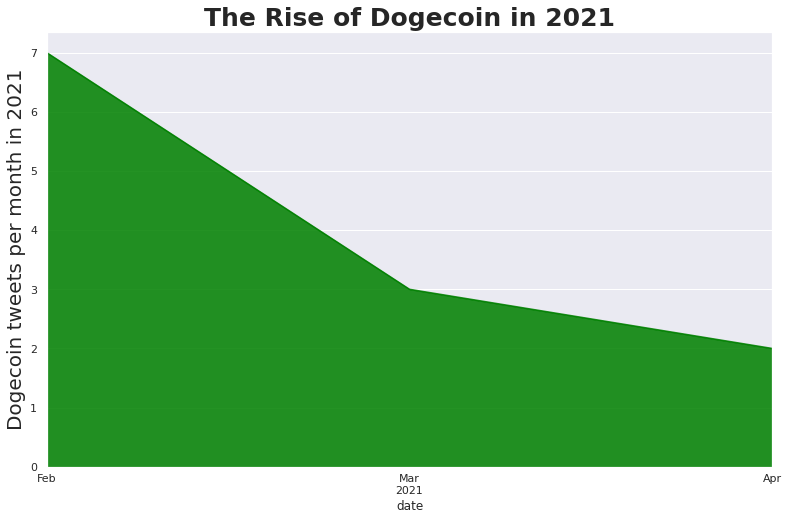

In [82]:
do_3=do_2021.groupby(pd.Grouper(key='date',freq='1M'))['tweet_amount'].sum()

plt.figure(figsize=(13.005,8))
plt.ylabel('Dogecoin tweets per month in 2021',fontsize=20)
plt.title('The Rise of Dogecoin in 2021',fontsize=25,fontweight='bold')
sns.set()
do_3.plot(kind='area',alpha=0.86,color='green')

## Inference


*   Elon used twitter to boost value till Feb in 2021 
*   He then went off twitter for about one and a half month that's evident from a previous plot in this analysis above. Which led to a heavy decline in Dogecoin's value and does potentially 'KILLING' the coin.


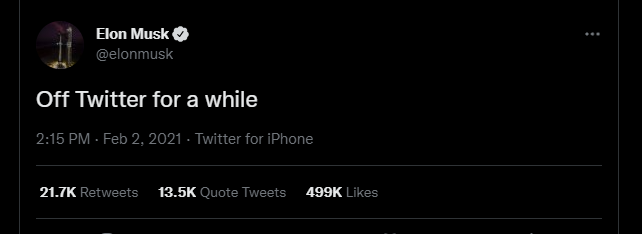



In [85]:
do_2021['date2']=do_2021.loc[:, 'date']
do_2021['date2']=do_2021['date2'].astype(str)

print(do_2021.tweet)

103      SpaceX is going to put a literal Dogecoin on t...
158      @dogecoinww @MattWallace888 @CorinnaKopf You r...
234      Origin of Doge Day Afternoon: The ancient Roma...
325                     @draecomino 2022: Dogecoin is dumb
397      @PPathole @dogecoin Just some used Antminer L3...
399      @dogecoin I just set up some little Doge minin...
430      If major Dogecoin holders sell most of their c...
452      Bought some Dogecoin for lil X, so he can be a...
486                          @Jbuttermost @Dogecoinrich 🤣🤣
488                                       @Dogecoinrich 🤣🤣
527                        Dogecoin is the people’s crypto
12530                          @sadiaslayy @DogecoinBets 😮
Name: tweet, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##Inference


*   These tweets clearly signify elonmusk boosted dogecoins value with his popularity in 2021 , tweets like "Dogecoin is the people's crypto" , "Bought some dogecoin for lil X" and "SpaceX is going to put a literal dogecoin on.." 
clearly indicate the desperate attempts to publicize dogecoin heavily. 
*   Dogecoin is a literal meme coin and Elon Musk's posts memes very often and knows the effect it has on the youth (basically the Milennials and the Genz) and thus him even talking about a meme is enough to hit to the top charts of the likes of social media platform like reddit and Instagram and thus influences people's financial decisions.



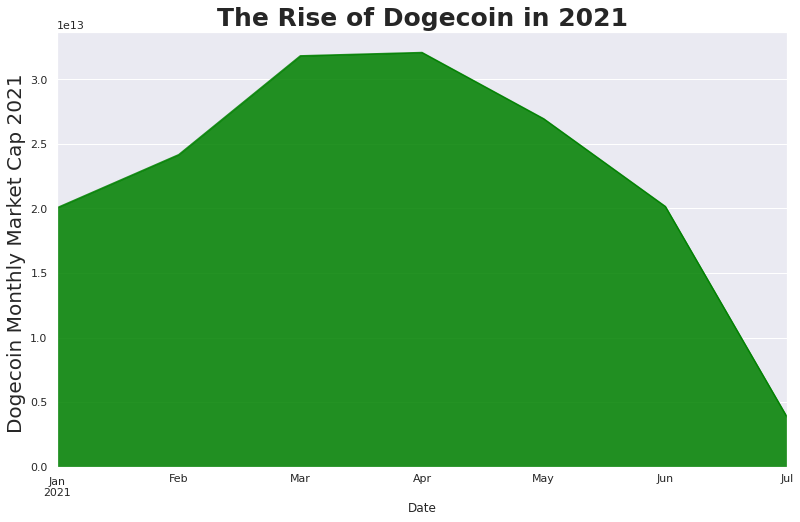

In [122]:
do_2021M=bt.loc[bt['date1'].str.contains("2021", case=False)]
do_2021Growth=do_2021M.groupby(pd.Grouper(key='Date', freq='1M'))['Marketcap'].sum()
plt.figure(figsize=(13.08,8))
plt.ylabel('Dogecoin Monthly Market Cap 2021 ',fontsize=20)
plt.title('The Rise of Dogecoin in 2021',fontsize=25,fontweight='bold')
sns.set()
do_2021Growth.plot(kind='area',alpha=0.86,color='green')



### Even though Elon stopped posting about the coin, it retained its value to some extent before plummeting in July.

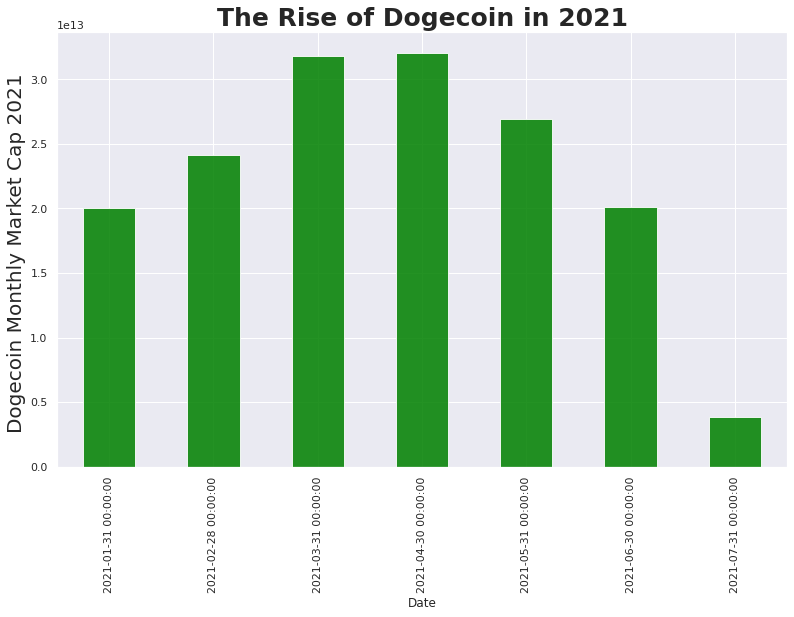

In [92]:
do_2021Growth.plot(kind='bar',alpha=0.86,color='green')


# Elon's Wealth Over Time


*   In this section we will visualize Elon Musk's wealth over time by plotting Tesla's stock value over time and mapping their increase
*   We will also try to measure his wealth vs his tweets to measure how exactly does his twitter usage affect his wealth in General



In [101]:
ts=pd.read_csv('TSLA.csv')
ts.head()#Printing the TSLA stock Dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


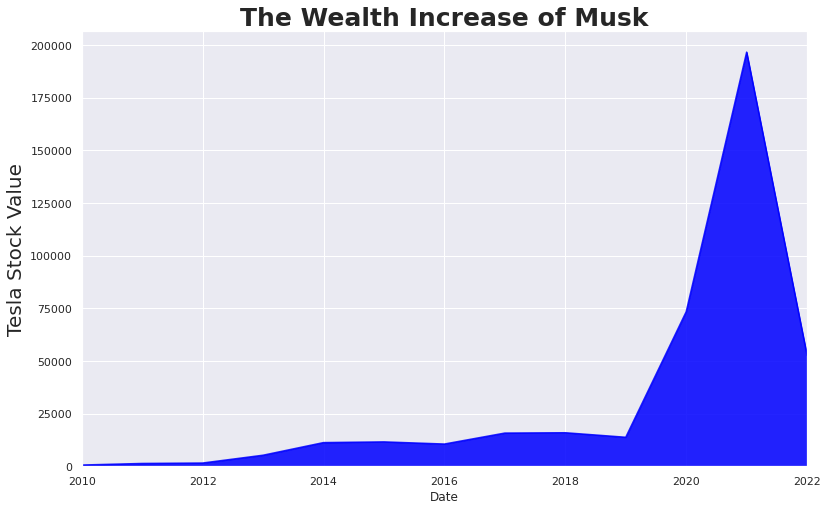

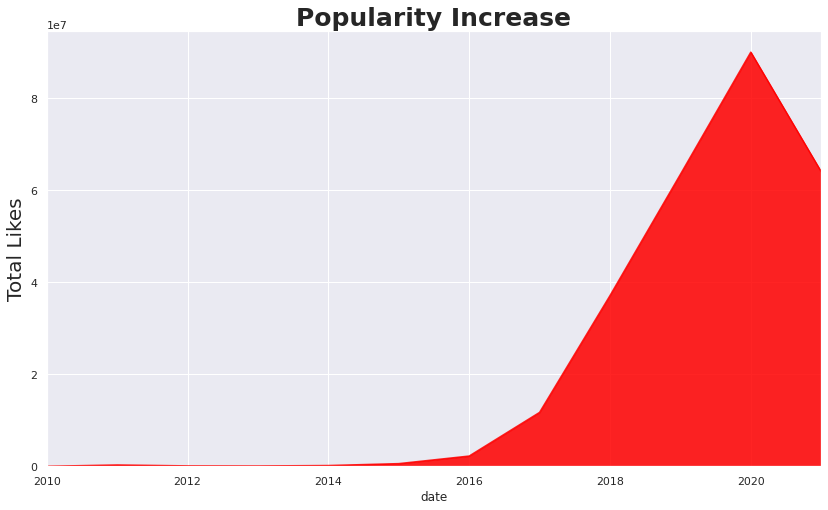

In [106]:
ts.Date=pd.to_datetime(ts.Date)
ts_yearsum=ts.groupby(pd.Grouper(key='Date', freq='1Y'))['Close'].sum()
plt.figure(figsize=(13,8))
plt.ylabel('Tesla Stock Value',fontsize=20)
plt.title('The Wealth Increase of Musk',fontsize=25,fontweight='bold')
sns.set()
ts_yearsum.plot(kind='area',alpha=0.86,color='blue')


df.date=pd.to_datetime(df.date)
plt.figure(figsize=(13.88,8))
plt.ylabel('Total Likes',fontsize=20)
plt.title('Popularity Increase',fontsize=25,fontweight='bold')
sns.set()
dt=df.groupby(pd.Grouper(key='date',freq='1Y'))['likes_count'].sum()
dt.plot(kind='area',color='red',alpha=0.86)

##Inference

*   Here we can see that there's a very strict correlation between Elon's Popularity and his Networth , that is , the more popular he becomes the more rich he becomes
*   Due to limitations of the tweet dataset further plotting past 2021 was not possible but we can predict that it will increase as well



In [109]:
ts['date1']=ts.loc[:, 'Date']
ts['date1']=ts['date1'].astype(str)
ts['year'] = ts['date1'].apply(lambda x: int(x.split("-")[0]))
ts.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date1,year
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,2010-06-29,2010
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,2010-06-30,2010
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,2010-07-01,2010
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2010-07-02,2010
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,2010-07-06,2010


In [110]:

df.head()

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,...,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount,date2,year
0,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,[],https://twitter.com/elonmusk/status/1381273474...,False,NaN,0,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",1,2021-04-11,2021
1,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,Love this beautiful shot,[],[],[],2464,1517,71161,...,[],https://twitter.com/elonmusk/status/1381273076...,False,NaN,0,NaN,[],1,2021-04-11,2021
2,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,1380,...,[],https://twitter.com/elonmusk/status/1381258144...,False,NaN,0,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",1,2021-04-11,2021
3,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,The art In Cyberpunk is incredible,[],[],[],8437,10329,228144,...,[],https://twitter.com/elonmusk/status/1381221447...,False,NaN,0,NaN,[],1,2021-04-11,2021
4,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,@itsALLrisky 🤣🤣,[],[],[],446,542,7489,...,[],https://twitter.com/elonmusk/status/1381129584...,False,NaN,0,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",1,2021-04-11,2021


In [111]:
dff=df
ts.pop("date1")

df2=pd.merge(dff,bt)
df2.head()

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,...,date2,year,Date,High,Low,Open,Close,Volume,Marketcap,date1
0,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,2021-04-11,2021,2021-01-01 23:59:59,29600.626950,28803.585014,28994.008916,29374.151889,4.073030e+10,5.460016e+11,2021-01-01 23:59:59
1,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,2021-04-11,2021,2021-01-02 23:59:59,33155.118819,29091.181191,29376.455834,32127.267939,6.786542e+10,5.972059e+11,2021-01-02 23:59:59
2,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,2021-04-11,2021,2021-01-03 23:59:59,34608.556738,32052.317076,32129.407356,32782.024466,7.866524e+10,6.094092e+11,2021-01-03 23:59:59
3,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,2021-04-11,2021,2021-01-04 23:59:59,33440.218569,28722.755271,32810.947644,31971.913522,8.116348e+10,5.943840e+11,2021-01-04 23:59:59
4,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,...,2021-04-11,2021,2021-01-05 23:59:59,34437.590592,30221.186739,31977.041132,33992.429344,6.754732e+10,6.319800e+11,2021-01-05 23:59:59


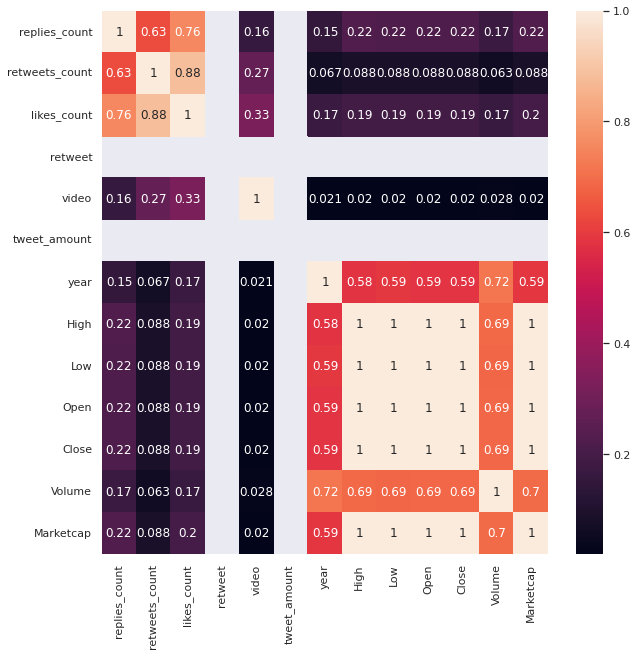

In [114]:
corr=df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True) 

### Here We are going to try to visualize a scatter plot between tweet likes/tweet amount vs the TSLA stock for 2020

<function matplotlib.pyplot.legend(*args, **kwargs)>

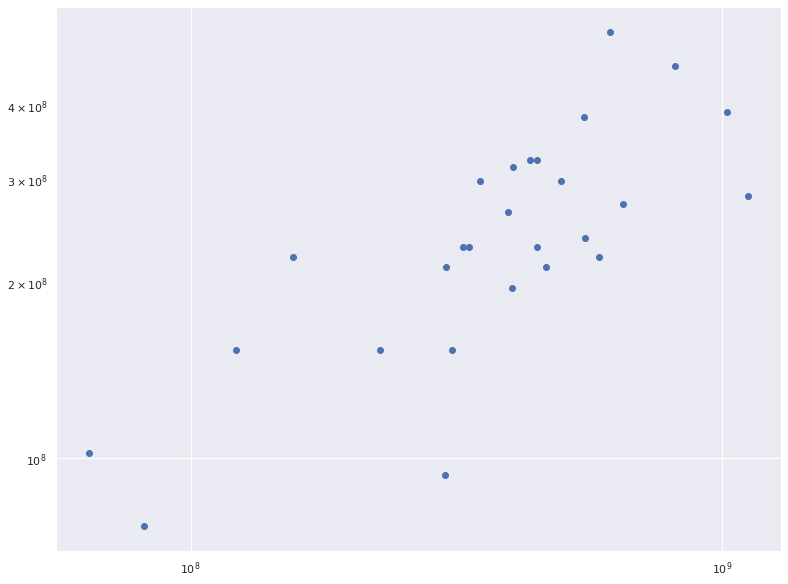

In [137]:
tsM=df2.loc[df2['date1'].str.contains("2021", case=False)]
tsmm=tsM.groupby(pd.Grouper(key='date', freq='4D')).sum()
plt.figure(figsize=(13, 10))
plt.scatter(tsmm.likes_count,tsmm.Close)
plt.xscale('log')
plt.yscale('log')

plt.legend


##Inference

*   From this Scatter it is clearly visible that there is an almost linear realtionship between Musk's sum of tweet likes per 4 days (indicating his popularity) vs his wealth , that is , TSLA's closing value's sum per 4 days.

* From here we can conclude that his wealth and popularity are correlated , meaning one increases when other does and vice versa.

---





# CONCLUSION

*   Through all the plots and data we have visualized we can find that Elon Musk's use of Twitter Directly influences his popularity




*   Through the likes of Crypto Musk has flourished the past 3 years, by allowing Teslas to be purchased by Bitcoin surged his popularity relating to crypto and hence boosted the coin's value in return

*   He did the same thing with Dogecoin , where we can assume he bought tonne of it and then used his massive popularity on twitter to influence users to buy Dogecoin and since Dogecoin was a memecoin and Elon's heavy influence in various meme cultures motivated the youth of the internet to buy lots of Dogecoin which not only increased his wealth but also significantly increase the value of the coin as well


*   At the last we have visualized Musk's Wealth vs his popularity and found out that there was a very heavy similarity between the graph patterns and which indeed led us to conclude that his wealth and his popularity are correlated , implying the more popular he becomes the more rich he is going to be.


*    Musk's growing agitations towards twitter and his constant indications of him buying the given company in the future as we have visualized in the first few sections give a genenral idea that he was indeed planning to acquire the company

* We have concluded in the forementioned statements that Musk's wealth and popularity are correlated and the main medium , the main social media platform he uses to connect to people is twitter . Which he can also use to share memes and influence the much younger youth ( the majority ) thus acquiring twitter gives him direct control over his popularity and thus direct control over his wealth.




